**Progetto di Programmazione di Applicazioni Data Intensive**

Mattia Mencaccini   
Filippo Badioli  
Lorenzo Morri  

# Introduzione

L'obiettivo di questo progetto è riuscire a prevedere se una mail sia SPAM o meno, analizzando le sue caratteristiche di contenuto e struttura.
Per svolgerlo utilizzeremo un dataset, recuperato da kaggle, dove ogni istanza rappresenta un email.
Il problema posto è quello di una classificazione binaria.

# Caricamento e preparazione del dataset

Vengono importate le librerie necessarie per scaricare i file, organizzare le strutture dati e disegnare i grafici.

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Caricamento dei dati e preprocessing**

In [2]:
dataset = pd.read_csv("spambase_updated.csv")


Cambiamo il tipo di dato di spam: si tratta di un valore booleano (0,1) e non int64.

Il resto dei tipi sembra essere coerente con il tipo di dato rappresentato.

In [3]:
dataset["spam"] = dataset["spam"].astype(bool)
dataset["spam"].dtype #controllo cambio 

dtype('bool')

Di seguito sono riportate le dimensioni in memoria, il numero di istanze non nulle, il tipo delle feature che compongono i dati raccolti nel dataset (training set) e le statistiche descrittive.

In [4]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Controlliamo che non ci siano dati mancanti:

In [5]:
dataset.isna().any().sum()

0

Non ci sono dati mancanti.

Controlliamo se ci sono righe duplicate, e in caso le eliminiamo:

In [6]:
print("Elementi duplicati: ", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()
print("Elementi duplicati dopo rimozione: ", dataset.duplicated().sum())

Elementi duplicati:  391
Elementi duplicati dopo rimozione:  0


**Significato delle feature**

Colonne delle funzionalità del contenuto del set di dati:
- **word_freq_RD**  
  Frequenza di una parola specifica nell'email (percentuale delle parole totali)

- **char_frHAR**  
  Frequenza di un carattere specifico (ad esempio, `;`, `(`, `[`, `#`) nell'eml.

- **capital_run_lengaverage**  
  Lunghezza media delle sequenze di lettere maiuscole consetive.

- **capital_run_lgth_longest**  
  Lunghezza della sequenza più lunga di lettere maiuscole coecutive.

- **capital_n_length_total**  
  Numero totale di lettere maiuscolnellail.

- **spam**  
  Indica se il messaggio email è spam (`1`: Spam, `0`: Ham).
0: Ham).

In [7]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


## ANALISI ESPLORATIVA

Analizziamo nello specifico la frequenza di mail spam:

<Axes: title={'center': 'Mail Spam'}>

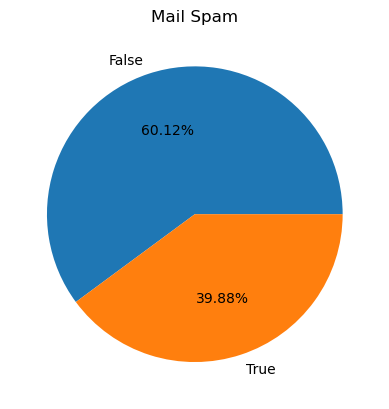

In [8]:
plt.title("Mail Spam")
dataset["spam"].value_counts().plot.pie(autopct="%.2f%%", ylabel="")

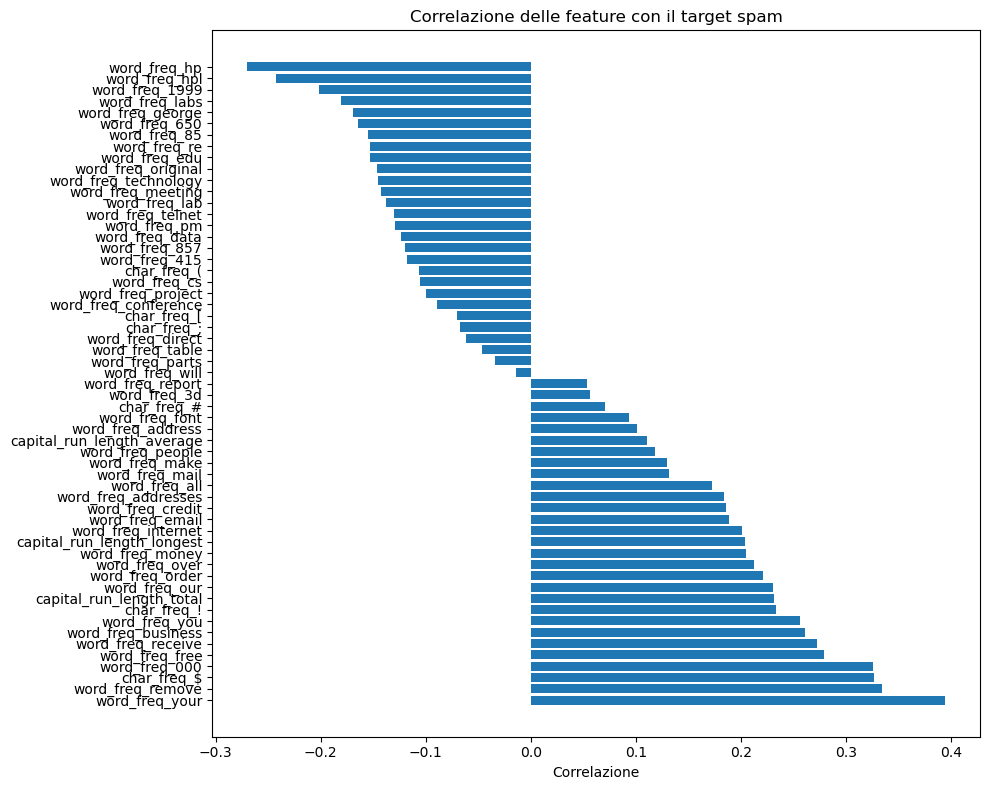

In [9]:
corr_target = dataset.corr()["spam"].drop("spam").sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(corr_target.index, corr_target.values)
plt.title("Correlazione delle feature con il target spam")
plt.xlabel("Correlazione")
plt.tight_layout()
plt.show()


Analizziamo i dati non spam

In [10]:
data_no_spam = dataset[dataset["spam"]==0].drop(columns=["spam"])#sono tutte non spam
data_no_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      174.461083
capital_run_length_longest     19.038325
capital_run_length_average      2.407102
word_freq_you                   1.349265
word_freq_hp                    0.942671
dtype: float64

Ora filtriamo il dataset e recuperiamo solo le mail spam per analizzare le possibili relazioni con i dati.

In [11]:
data_spam = dataset[dataset["spam"]==1].drop(columns=["spam"])#sono tutte spam
data_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      467.132222
capital_run_length_longest    102.038714
capital_run_length_average      9.871248
word_freq_you                   2.274771
word_freq_your                  1.366522
dtype: float64

Otteniamo differenza relativa per vedere quali parole sono più presenti nelle mail spam.

In [12]:
data_diff=((data_spam.mean() - data_no_spam.mean())/data_no_spam.mean()).sort_values(ascending=False)
data_diff.head(10)

word_freq_3d           159.564243
word_freq_000           31.459779
word_freq_remove        29.285179
word_freq_credit        23.010680
char_freq_$             12.998381
word_freq_addresses     10.644001
word_freq_money          9.575461
word_freq_receive        6.475120
word_freq_free           6.277448
word_freq_business       4.690372
dtype: float64

<Axes: >

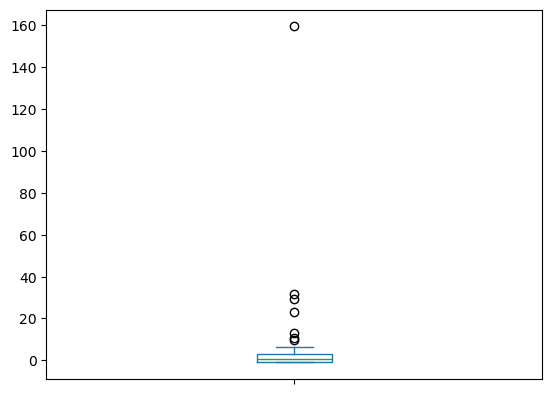

In [13]:
data_diff.plot.box()

Recuperiamo dati estremamente significativi

In [14]:
Q1 = data_diff.quantile(0.25)
Q3 = data_diff.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (data_diff < Q1 - 1.5 * IQR) | (data_diff > Q3 + 1.5 * IQR)
data_diff[outlier_mask]

word_freq_3d           159.564243
word_freq_000           31.459779
word_freq_remove        29.285179
word_freq_credit        23.010680
char_freq_$             12.998381
word_freq_addresses     10.644001
word_freq_money          9.575461
dtype: float64

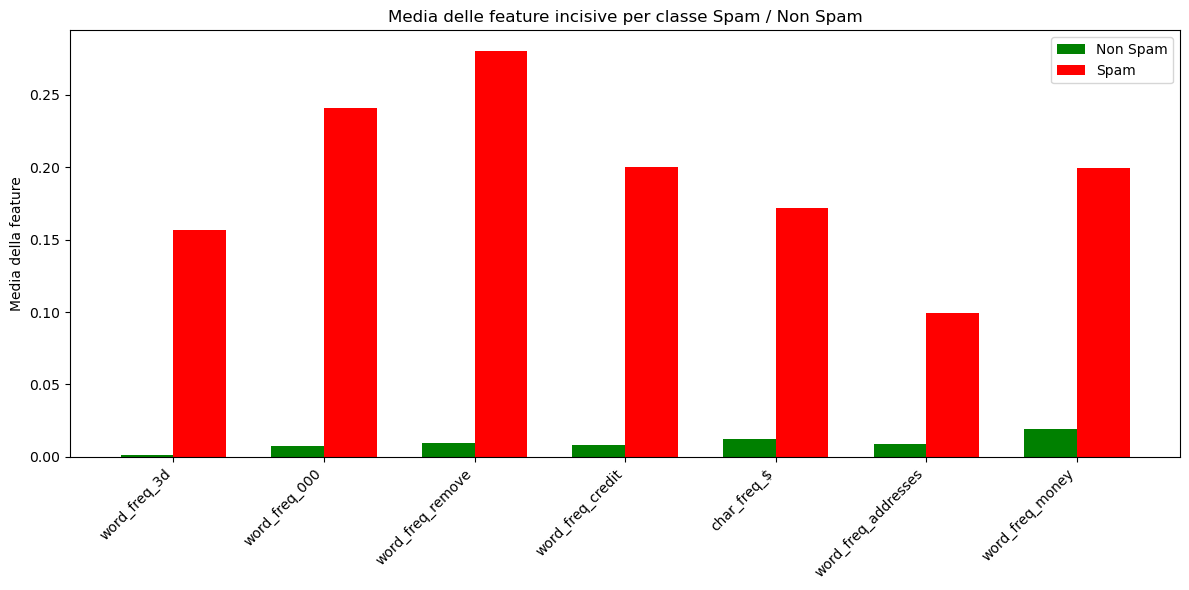

In [15]:
colonne_significative = data_diff[outlier_mask].index.tolist()

# Calcola la media delle feature per spam=0 e spam=1
media_non_spam = dataset[dataset["spam"] == 0][colonne_significative].mean()
media_spam = dataset[dataset["spam"] == 1][colonne_significative].mean()

# Crea il grafico
x = np.arange(len(colonne_significative))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, media_non_spam, width, label='Non Spam', color='green')
plt.bar(x + width/2, media_spam, width, label='Spam', color='red')

plt.xticks(x, colonne_significative, rotation=45, ha='right')
plt.ylabel('Media della feature')
plt.title('Media delle feature incisive per classe Spam / Non Spam')
plt.legend()
plt.tight_layout()
plt.show()


# Preparazione dati

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = dataset.drop("spam",axis=1)
y = dataset["spam"]

#primo split -> 80% train, 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#secondo split -> 10% val, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")
print("Verifica sul numero di colonne totale: ", len(X_train)+len(X_test)+len(X_val)==len(dataset))

Train set: 3368
Validation set: 421
Test set: 421
Verifica sul numero di colonne totale:  True


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Addestramento dei modelli

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Logistic Regression

In [20]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predizioni
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Report delle metriche
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))


=== Logistic Regression ===
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       253
        True       0.92      0.92      0.92       168

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



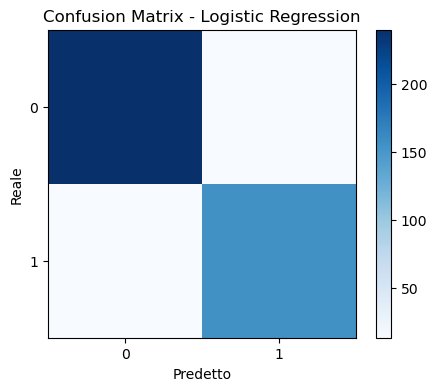

True Negative (Non Spam corretto): 240
False Positive (Non Spam sbagliato come Spam): 13
False Negative (Spam sbagliato come Non Spam): 13
True Positive (Spam corretto): 155


In [21]:
# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 4))
plt.imshow(cm_log, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_log.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

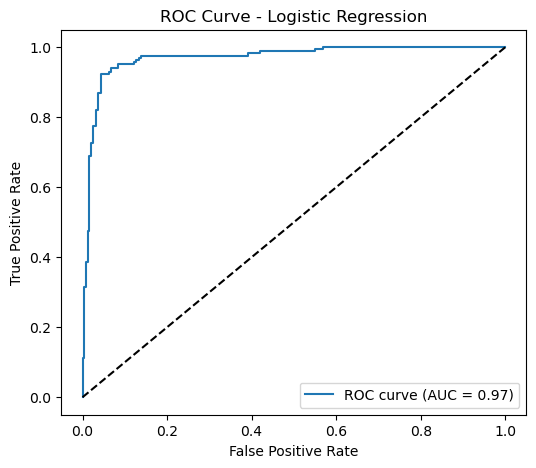

In [22]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"ROC curve (AUC = {roc_auc_log:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


La Logistic Regression fornisce già buoni risultati sul problema di classificazione spam / non spam, con una accuracy del 92% e un AUC molto alto (~0.97). Il modello riesce a bilanciare bene la capacità di identificare spam (recall ~87%) e di non classificare email legittime come spam (precision ~95%).

## Random forest

In [23]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predizioni
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Report delle metriche
print("=== Random Forest Classifier ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest Classifier ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       253
        True       0.93      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.95      0.95      0.95       421



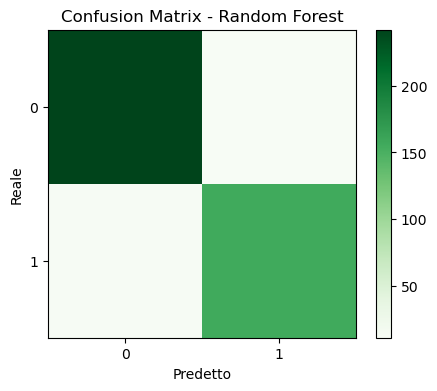

True Negative (Non Spam corretto): 242
False Positive (Non Spam sbagliato come Spam): 11
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


In [24]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm_rf, cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_rf.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

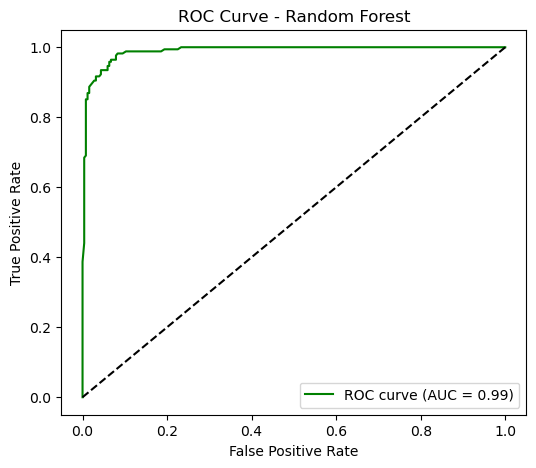

In [25]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


## XGBoost

In [27]:
# Pulizia nomi delle colonne
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

X_train_xgb.columns = [col.replace('[', 'par_open')
                              .replace(']', 'par_close')
                              .replace('<', 'less')
                              for col in X_train_xgb.columns]

X_test_xgb.columns = X_train_xgb.columns

In [29]:
# XGBoost Classifier
xgb_clf = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_xgb, y_train)

#Predizioni
y_pred_xgb = xgb_clf.predict(X_test_xgb)
y_prob_xgb = xgb_clf.predict_proba(X_test_xgb)[:, 1]

# Report delle metriche
print("=== XGBoost Classifier ===")
print(classification_report(y_test, y_pred_xgb))

=== XGBoost Classifier ===
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       253
        True       0.92      0.93      0.93       168

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



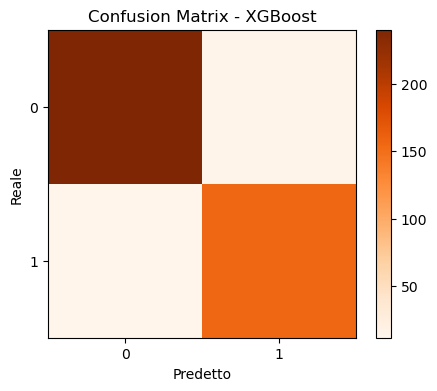

True Negative (Non Spam corretto): 240
False Positive (Non Spam sbagliato come Spam): 13
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


In [30]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 4))
plt.imshow(cm_xgb, cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_xgb.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

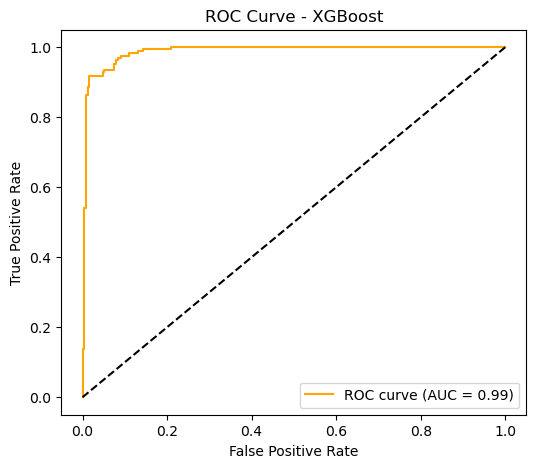

In [31]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC curve (AUC = {roc_auc_xgb:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


Il modello XGBoost ha mostrato ottime prestazioni, in linea o superiori a quelle della Random Forest ottimizzata. L’alta capacità predittiva, insieme alla possibilità di eseguire una ricerca più ampia degli iperparametri, rende XGBoost un valido candidato come miglior classificatore per il problema di rilevazione dello spam.

 tre modelli hanno fornito performance molto buone sul dataset Spambase. La Logistic Regression si conferma interpretabile e con un ottimo bilanciamento, ma sia la Random Forest che XGBoost riescono a catturare meglio le relazioni non lineari tra le feature, con metriche superiori soprattutto in termini di recall e AUC. Tra i modelli provati, XGBoost ha ottenuto le migliori prestazioni complessive.

# Ricerca iperparametri

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [34]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search_rf.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori iperparametri RF:", grid_search_rf.best_params_)


Migliori iperparametri RF: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


=== Random Forest Ottimizzata ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       253
        True       0.94      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.95       421
weighted avg       0.95      0.95      0.95       421



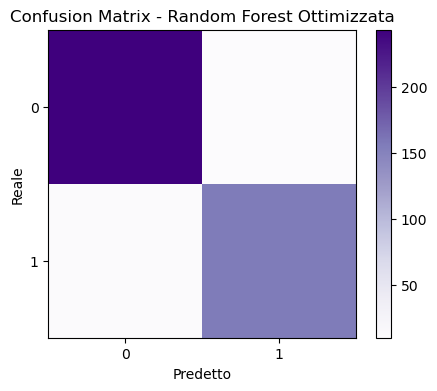

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


In [37]:
# Predizioni con il miglior modello
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Report
print("=== Random Forest Ottimizzata ===")
print(classification_report(y_test, y_pred_best_rf))

# Confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm_best_rf, cmap='Purples')
plt.title("Confusion Matrix - Random Forest Ottimizzata")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_best_rf.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

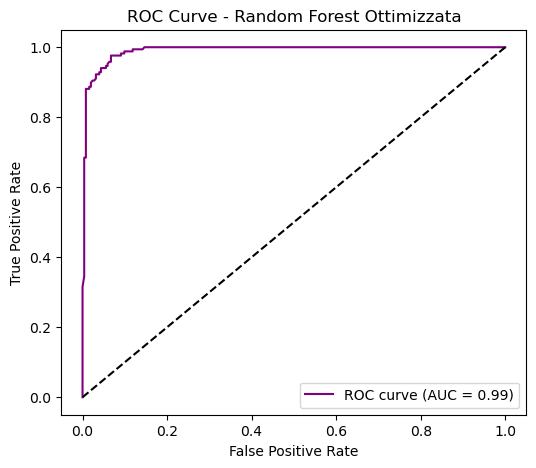

In [38]:
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_prob_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_prob_best_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_best_rf, tpr_best_rf, label=f"ROC curve (AUC = {roc_auc_best_rf:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Ottimizzata")
plt.legend()
plt.show()

Come evidenziato dai risultati, l'ottimizzazione degli iperparametri della Random Forest non ha portato variazioni significative rispetto al modello base. Questo comportamento è atteso, in quanto il modello di partenza aveva già raggiunto ottime performance e il dataset presenta caratteristiche adatte a Random Forest anche con i parametri di default.

In [35]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search_xgb.fit(X_train_xgb, y_train)

# Migliori parametri trovati
print("Migliori iperparametri XGBoost:", grid_search_xgb.best_params_)


Migliori iperparametri XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


=== XGBoost Ottimizzato ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       253
        True       0.94      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.95       421
weighted avg       0.95      0.95      0.95       421



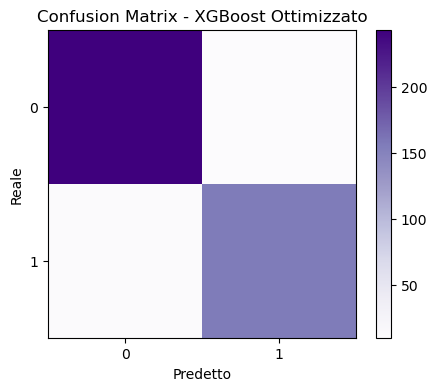

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


In [40]:
# Best estimator XGBoost trovato con GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Predizioni su test set
y_pred_best_xgb = best_xgb.predict(X_test_xgb)
y_prob_best_xgb = best_xgb.predict_proba(X_test_xgb)[:, 1]

# Report di classificazione
print("=== XGBoost Ottimizzato ===")
print(classification_report(y_test, y_pred_best_xgb))

# Matrice di confusione
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

plt.figure(figsize=(5, 4))
plt.imshow(cm_best_xgb, cmap='Purples')
plt.title("Confusion Matrix - XGBoost Ottimizzato")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

# Estrazione valori TN, FP, FN, TP
TN, FP, FN, TP = cm_best_xgb.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

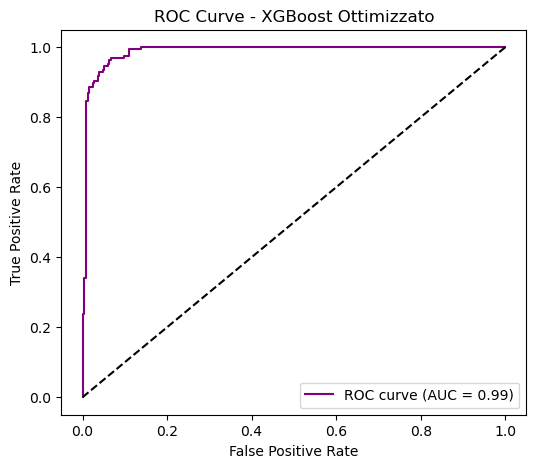

In [41]:
# Calcolo FPR, TPR e AUC per XGBoost
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, y_prob_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_prob_best_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_best_xgb, tpr_best_xgb, label=f"ROC curve (AUC = {roc_auc_best_xgb:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Ottimizzato")
plt.legend()
plt.show()